### Heart transplants
The Stanford University Heart Transplant Study was conducted to determine
whether an experimental heart transplant program increased lifespan. Each patient entering the program
was designated an official heart transplant candidate, meaning that he was gravely ill and would most likely
benefit from a new heart. Some patients got a transplant and some did not. The variable transplant
indicates which group the patients were in; patients in the treatment group got a transplant and those in the
control group did not. Of the 34 patients in the control group, 30 died. Of the 69 people in the treatment
group, 45 died. Another variable called survived was used to indicate whether or not the patient was alive
at the end of the study.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = {'groups':["treatment","control"], 'died':[45,30], 'not died':[24,4], 'total':[69,34]}

In [14]:
df = pd.DataFrame(data=data)

In [15]:
df

,groups,died,not died,total
0,treatment,45,24,69
1,control,30,4,34


In [42]:
rate = df['died'].sum()/df['total'].sum()
print(ctr_rate)

0.7281553398058253


In [27]:
trt_rate = df['died'][0]/df['total'][0]
print(trt_rate)

0.6521739130434783


In [43]:
diff = trt_rate - rate
print(diff)

-0.07598142676234698


*We see a huge difference between rates. We want to check if treatment helps in reducing death rate*

#### H_o: treatment doesn't help, difference is around 0
#### H_a: treatment helps, difference is less than 0

In [39]:
died = df['died'].sum()
total = df['total'].sum()
trt_size = df['total'][0]

print(died, total, trt_size, ctr_size)

75 103 69 34


#### simulation and shuffle

In [46]:
sim = np.zeros(total, dtype=int)
sim[:died] = 1

diffs = [0]*1000

for i in range(1000):
    np.random.shuffle(sim)
    # dividing into treatment and control groups
    trt_group = sim[:trt_size]
    trt_group = trt_group.astype(bool)
    # counting dead rate
    ct_trt = np.count_nonzero(trt_group)
    diffs[i] = ct_trt/trt_size - rate

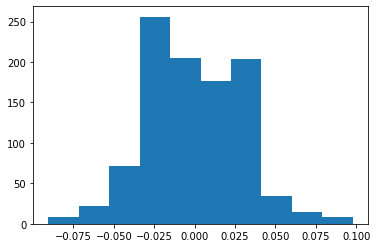

In [47]:
plt.hist(diffs, bins=10)
plt.show()

*We see our data is normally distributed with the mean around 0, and our difference -0.075 is an outlier and is less than 0. We reject H_o and accept H_a.*